# Requirements

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [ ]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **mean temperature** in the city of Delhi. Your task involves employing bagging and boosting methods to forecast the **mean temperature**. To accomplish this use data from the preceding three days, consisting of **mean temperature**, **humidity**, **wind speed**, and **mean pressure**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Dataset

In [1]:
!gdown 1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC
To: /content/climate-data.csv
100% 78.1k/78.1k [00:00<00:00, 2.69MB/s]


## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [3]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('./climate-data.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.set_index('date', inplace=True)

KeyError: "None of ['date'] are in the columns"

In [12]:
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


Explore the dataset using visualizations of your choice.

<Axes: >

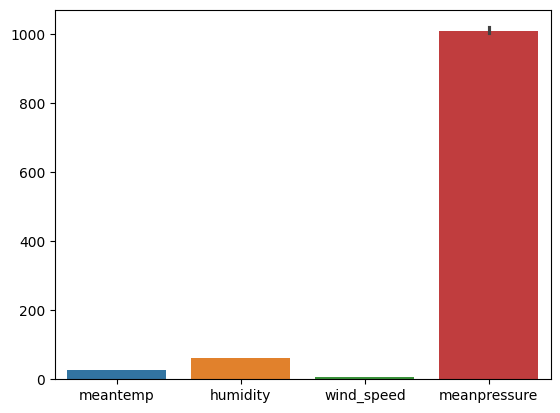

In [7]:
# Write your code here. Add as many boxes as you need.
sns.barplot(df)

In [8]:
df['humidity'].value_counts()

humidity
65.500000    9
65.750000    8
67.625000    7
69.000000    7
63.875000    7
            ..
67.550000    1
94.300000    1
78.636364    1
74.700000    1
57.857143    1
Name: count, Length: 897, dtype: int64

# Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [13]:
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [14]:
# Write your code here. Add as many boxes as you need.
for i in range(1,4):
    df[f'meantemp_shift_lag_{i}'] = df['meanpressure'].shift(i)
    df[f'humidity_shift_lag_{i}'] = df['humidity'].shift(i)
    df[f'wind_speed_lag_{i}'] = df['wind_speed'].shift(i)

In [15]:
df.head()

,meantemp,humidity,wind_speed,meanpressure,meantemp_shift_lag_1,humidity_shift_lag_1,wind_speed_lag_1,meantemp_shift_lag_2,humidity_shift_lag_2,wind_speed_lag_2,meantemp_shift_lag_3,humidity_shift_lag_3,wind_speed_lag_3
date,,,,,,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1015.666667,84.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1017.800000,92.000000,2.980000,1015.666667,84.5,0.000000,NaN,NaN,NaN
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1018.666667,87.000000,4.633333,1017.800000,92.0,2.980000,1015.666667,84.5,0.00
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1017.166667,71.333333,1.233333,1018.666667,87.0,4.633333,1017.800000,92.0,2.98


In [16]:
data = df.dropna()

In [20]:
df.isnull().sum()

meantemp                0
humidity                0
wind_speed              0
meanpressure            0
meantemp_shift_lag_1    1
humidity_shift_lag_1    1
wind_speed_lag_1        1
meantemp_shift_lag_2    2
humidity_shift_lag_2    2
wind_speed_lag_2        2
meantemp_shift_lag_3    3
humidity_shift_lag_3    3
wind_speed_lag_3        3
dtype: int64

In [18]:
data.isnull().sum()

meantemp                0
humidity                0
wind_speed              0
meanpressure            0
meantemp_shift_lag_1    0
humidity_shift_lag_1    0
wind_speed_lag_1        0
meantemp_shift_lag_2    0
humidity_shift_lag_2    0
wind_speed_lag_2        0
meantemp_shift_lag_3    0
humidity_shift_lag_3    0
wind_speed_lag_3        0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [21]:
# Write your code here. Add as many boxes as you need.
features = data.drop('meanpressure', axis=1)
target = data['meanpressure']

In [22]:
features.head()

,meantemp,humidity,wind_speed,meantemp_shift_lag_1,humidity_shift_lag_1,wind_speed_lag_1,meantemp_shift_lag_2,humidity_shift_lag_2,wind_speed_lag_2,meantemp_shift_lag_3,humidity_shift_lag_3,wind_speed_lag_3
date,,,,,,,,,,,,
2013-01-04,8.666667,71.333333,1.233333,1018.666667,87.000000,4.633333,1017.800000,92.000000,2.980000,1015.666667,84.500000,0.000000
2013-01-05,6.000000,86.833333,3.700000,1017.166667,71.333333,1.233333,1018.666667,87.000000,4.633333,1017.800000,92.000000,2.980000
2013-01-06,7.000000,82.800000,1.480000,1016.500000,86.833333,3.700000,1017.166667,71.333333,1.233333,1018.666667,87.000000,4.633333
2013-01-07,7.000000,78.600000,6.300000,1018.000000,82.800000,1.480000,1016.500000,86.833333,3.700000,1017.166667,71.333333,1.233333
2013-01-08,8.857143,63.714286,7.142857,1020.000000,78.600000,6.300000,1018.000000,82.800000,1.480000,1016.500000,86.833333,3.700000


In [24]:
pd.DataFrame(target.head())

,meanpressure
date,
2013-01-04,1017.166667
2013-01-05,1016.500000
2013-01-06,1018.000000
2013-01-07,1020.000000
2013-01-08,1018.714286


In [25]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1167, 12)
(292, 12)
(1167,)
(292,)


## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [31]:
# Write your code here. Add as many boxes as you need.
model = RandomForestRegressor(max_depth=2, random_state=0)

In [32]:
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

Use the trained model to make predictions for the test set.

In [33]:
# Write your code here. Add as many boxes as you need.
y_pred = model.predict(x_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [39]:
# Write your code here. Add as many boxes as you need.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [40]:
print(f"Mean absolute error: {mae}")
print(f"Mean square error: {mse}")
print(f"R2 score: {r2}")

Mean absolute error: 37.71685471113507
Mean square error: 162025.20630080428
R2 score: 0.0009873484321941683


### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [36]:
# Write your code here. Add as many boxes as you need.
model2 = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, objective='reg:squarederror')

Use the trained model to make predictions for the test set.

In [37]:
# Write your code here. Add as many boxes as you need.
model2.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
y_pred_2 = model2.predict(x_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [43]:
# Write your code here. Add as many boxes as you need.
mae_xgb = mean_absolute_error(y_test, y_pred_2)
mse_xgb = mean_squared_error(y_test, y_pred_2)
r2_xgb = r2_score(y_test, y_pred_2)

In [44]:
print(f"Mean absolute error: {mae_xgb}")
print(f"Mean square error: {mse_xgb}")
print(f"R2 score: {r2_xgb}")

Mean absolute error: 37.441569480143464
Mean square error: 162064.12872438447
R2 score: 0.0007473611211205045


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of estimators (`n_estimators`) for the XGBoost model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `n_estimators` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [45]:
# Write your code here. Add as many boxes as you need.
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, shuffle=False)

## Fine-tuning the XGBoost Hyperparameter
Experiment with various values for `n_estimators` and evaluate the model's performance using cross-validation.

In [50]:
# Write your code here. Add as many boxes as you need.
model_xgb = XGBRegressor(max_depth=5, learning_rate=0.1, objective='reg:squarederror')
param_grid = {
    'n_estimators': [20, 50, 100]
}
time_series_cv = TimeSeriesSplit(n_splits=5)

In [53]:
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=time_series_cv, scoring='neg_mean_squared_error')

In [54]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    learning_rate=0.1, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'n_estimators': [20, 50, 100]},
             scoring='neg_mean_squared_error')

## Final Assessment of the Model Performance
Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

In [55]:
# Write your code here. Add as many boxes as you need.
best_model = grid_search.best_estimator_

In [56]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
y_pred_best = best_model.predict(x_test)

In [70]:
grid_search.best_params_['n_estimators']

20

In [59]:
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

In [60]:
print(f"Mean absolute error: {mae_best}")
print(f"Mean square error: {mse_best}")
print(f"R2 score: {r2_best}")

Mean absolute error: 22.223175592138563
Mean square error: 16291.338680690045
R2 score: 0.0009878435255781248


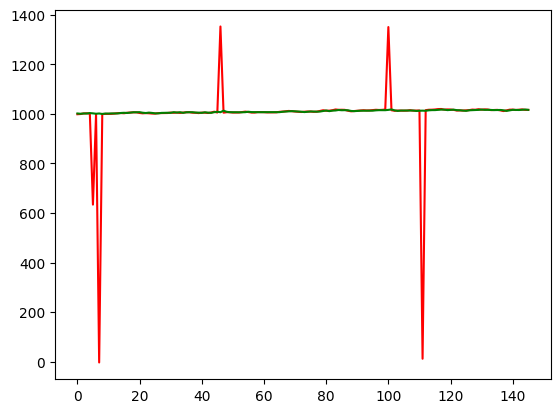

In [67]:
plt.plot(y_test.values, label='Actual', color='red')
plt.plot(pd.DataFrame(y_pred_best).values, label='Prediction', color='green')
plt.show()

In [ ]:
entropy - how decision tree decides to split the data
	(imputirty in a bunch of examples)
	trying to find variables and split points that's going to make
	subsets as pure as possible
min0 - purity
max1 - impurity

decision tree will maximize the information gain
*measure of how much information is gained by splitting a set of data on a particular feature